In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [350]:
car_price = 69000
start_cap = 80000

In [351]:
downpayment_list = [i for i in range(int(car_price*0.3),car_price,2000)]
final_cost_1 = [(0.0298*1*(car_price - downpayment_list[i])+(car_price - downpayment_list[i])) for i in range(0,len(downpayment_list))]

In [352]:
car_loan_df = pd.DataFrame({"Downpayment" : downpayment_list
                            })

In [353]:
for z in range(1,8):
    car_loan_df["{} Year".format(z)] = [((0.0298*z*(car_price - downpayment_list[i])+(car_price - downpayment_list[i])))+downpayment_list[i] for i in range(0,len(downpayment_list))]

In [354]:
car_melt = pd.melt(car_loan_df, id_vars="Downpayment")

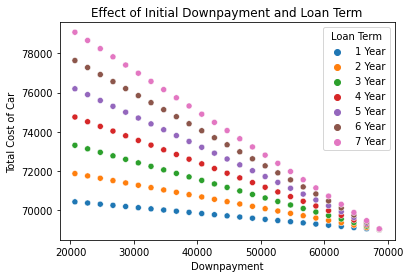

In [355]:
sp = sns.scatterplot('Downpayment', 'value', data=car_melt, hue='variable')
plt.legend(title = "Loan Term")
plt.ylabel("Total Cost of Car")
plt.title("Effect of Initial Downpayment and Loan Term")
plt.show()

In [356]:
def fv(monthly, interest_rate, time):
    return (monthly * ((((1 + interest_rate)**time)-1)/(interest_rate)))

def ifv(initial, monthly, interest_rate, time):
    return ((initial*((1+interest_rate)**time)) + (monthly * ((((1 + interest_rate)**time)-1)/(interest_rate))))

In [357]:
def car_tradeoff_calc(car_price,downpayment,years,bank_int,capital_invest,simir):
    total_cost = ((bank_int*years*(car_price - downpayment)+(car_price - downpayment))) + downpayment
    pay_monthly = (total_cost - downpayment)/(years*12)
    pre_invest_monthly = max(0,((capital_invest-downpayment)/(10*12)-pay_monthly))
    pre_invest_total = fv(pre_invest_monthly, simir, years*12)
    post_invest_monthly = ((capital_invest-((pay_monthly+ pre_invest_monthly)*years*12)-downpayment)/((10-years)*12))
    post_invest_total = ifv(pre_invest_total,post_invest_monthly,simir,((10-years)*12))
    total_returns = pre_invest_total + post_invest_total
    return(post_invest_total)

In [358]:
payoff_df = pd.DataFrame({"Downpayment" : downpayment_list
                            })

In [359]:
if (start_cap < car_loan_df.iloc[0,-1]):
    print("Error: Starting capital not large enough")
else:
    for z in range(1,8):
        payoff_df["{} yr".format(z)] = [car_tradeoff_calc(car_price,downpayment_list[i],z,0.0298,start_cap,0.007) for i in range(0,len(downpayment_list))]

In [360]:
payoff_df_melt = pd.melt(payoff_df, id_vars="Downpayment")

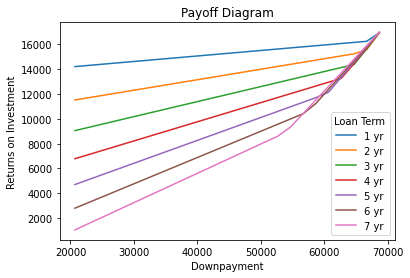

In [361]:
sp = sns.lineplot('Downpayment', 'value', data=payoff_df_melt, hue='variable')
plt.legend(title = "Loan Term")
plt.ylabel("Returns on Investment")
plt.title("Payoff Diagram")
plt.show()